In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [41]:
t_0 = 1.44e4
T_0 = 4.15e-16
beta_on = 2e13
low = 0.5*beta_on
high = 1.5*beta_on

In [42]:
beta = np.linspace(low, high, 100)
v_1 = beta*t_0*T_0
v_1_min = v_1[0]
v_1_max = v_1[-1]

Define parameters and model with different v1 functional forms 

In [43]:
alpha_1 = 1#3e-4
alpha_2 = 1.2
fk_max = 5
R_k = 0.5
v_1 = 1.2e2
mus = [2, 10, 20]
v_2 = 14.4 *1e-1

In [44]:
def kill_function(R):
     f = fk_max*(R/(R + R_k))

     return f


In [45]:
def model_normal_v_1(t, z, gamma, mu, v_1=v_1):

    dAdt = -alpha_1*(1 - z[1])*z[0]*z[2] + alpha_2*gamma*z[1]*z[2]
    dRdt = (alpha_1/gamma)*(1 - z[1])*z[0] - alpha_2*z[1]
    dSdt = -kill_function(z[1])*z[3]
    dCdt = v_1*((mu/20) - z[3])*(z[2] - z[3]) - v_2*z[3] - kill_function(z[1])*z[3]
    dzdt = [dAdt, dRdt, dSdt, dCdt]

    return dzdt

In [46]:
def model_linear_v_1(t, z, gamma, mu):

    dAdt = -alpha_1*(1 - z[1])*z[0]*z[2] + alpha_2*gamma*z[1]*z[2]
    dRdt = (alpha_1/gamma)*(1 - z[1])*z[0] - alpha_2*z[1]
    dSdt = -kill_function(z[1])*z[3]
    dCdt = (v_1_min + z[1]*(v_1_max - v_1_min))*((mu/20) - z[3])*(z[2] - z[3]) - v_2*z[3] - kill_function(z[1])*z[3]
    dzdt = [dAdt, dRdt, dSdt, dCdt]

    return dzdt

In [47]:
R_a = 0.3
def model_Hill_v_1(t, z, gamma, mu):

    dAdt = -alpha_1*(1 - z[1])*z[0]*z[2] + alpha_2*gamma*z[1]*z[2]
    dRdt = (alpha_1/gamma)*(1 - z[1])*z[0] - alpha_2*z[1]
    dSdt = -kill_function(z[1])*z[3]
    dCdt = (v_1_min + (((z[1]**2)*(v_1_max - v_1_min))/(z[1]**2 + R_a**2)))*((mu/20) - z[3])*(z[2] - z[3]) - v_2*z[3] - kill_function(z[1])*z[3]
    dzdt = [dAdt, dRdt, dSdt, dCdt]

    return dzdt

In [48]:
print(v_1_min, v_1_max)

59.76 179.28


Define function to solve for C and plot C for over time for different functional forms of v1

In [49]:
z0 = [1, 0, 1, 0]
t= np.geomspace(0.000001, 1, 10000)
t_span = [0.000001, 1]



def solve_for_C(model, gamma, mu):
    z = solve_ivp(model, t_span, z0, args = (gamma, mu), method ='Radau', t_eval = t)
    C = z.y[3]

    return C

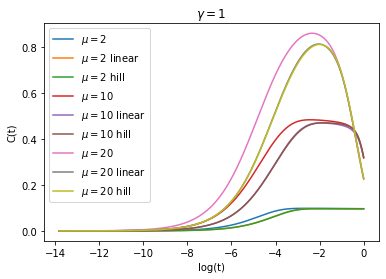

In [50]:

for mu in mus:
    c_sol = solve_for_C(model_normal_v_1, 1, mu)
    plt.plot(np.log(t), c_sol, label = '$\mu =$' + str(mu))
    c_sol = solve_for_C(model_linear_v_1, 1, mu)
    plt.plot(np.log(t), c_sol, label = '$\mu =$' + str(mu) + ' linear')
    c_sol = solve_for_C(model_Hill_v_1, 1, mu)
    plt.plot(np.log(t), c_sol, label = '$\mu =$' + str(mu) + ' hill')

plt.legend()
plt.title('$ \gamma = 1$')
plt.xlabel('log(t)')
plt.ylabel('C(t)')
plt.show()

Sensitivity of kill percentage to conjugation rate v1

In [51]:
v_1_array = np.linspace(v_1_min, v_1_max, 50)
gammas = [1, 1e-3, 1e-6]
z0 = [1, 0, 1, 0] 
t = np.arange(0, 1.1, 0.1)
t_span = [0, 1]
Kill_percents = []

def solve_for_S(model, gamma, mu, v_1):
    z = solve_ivp(model, t_span, z0, args = (gamma, mu, v_1), method ='Radau', t_eval = t)
    S = z.y[2]

    return S

for gamma in gammas:
    sol = []
    for v_1 in v_1_array:
        S_array = solve_for_S(model_normal_v_1, gamma, 10, v_1)
        kill_val = 1 - (S_array[-1]/S_array[0])
        sol.append(kill_val)
    Kill_percents.append(sol)

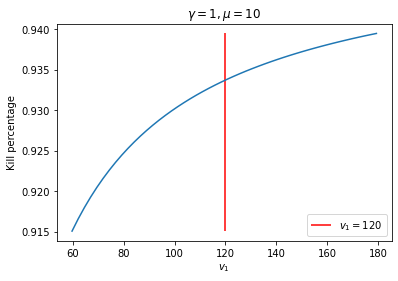

In [52]:
vals = Kill_percents[2]
plt.plot(v_1_array, vals)
plt.ylabel('Kill percentage')
plt.xlabel('$ v_1 $')
plt.vlines(120, np.min(vals), np.max(vals), 'r', label='$v_1 = 120$')
plt.title('$\gamma = 1, \mu = 10$')
plt.legend(loc='lower right')
plt.show()